In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
result = pd.read_csv('result sum.csv')

In [4]:
result.head()

,type,seed,accuracy,AUC,precision,recall,F1
0,original,6171,0.9772,0.799474,0.912121,0.602,0.725301
1,original,2292,0.9766,0.799158,0.895833,0.602,0.720096
2,original,4399,0.9758,0.797789,0.877193,0.600,0.712589
3,original,8125,0.9762,0.797053,0.889881,0.598,0.715311
4,original,2492,0.9756,0.797684,0.872093,0.600,0.710900


In [31]:
result_avg = result.groupby(['type']).mean().reset_index()

In [39]:
result_avg = result_avg.drop(['seed'], axis=1)


In [15]:
result_avg

,type,accuracy,AUC,precision,recall,F1
0,SHAP,0.97644,0.800022,0.889350,0.6036,0.719313
1,build_in,0.97554,0.795750,0.876235,0.5952,0.708786
2,original,0.97628,0.798232,0.889424,0.6004,0.716839
3,permutation,0.97644,0.805136,0.883442,0.6120,0.721640


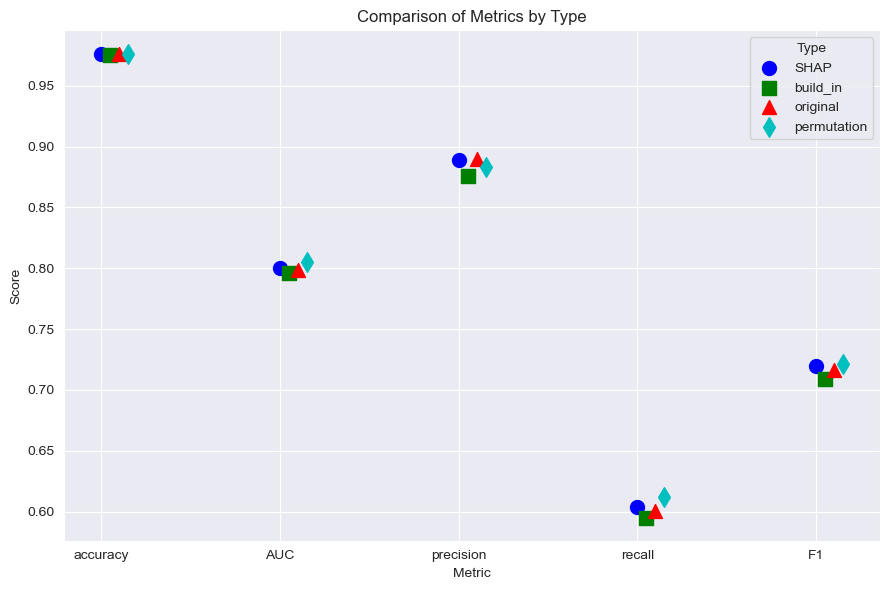

In [44]:

fig, ax = plt.subplots(figsize=(9, 6))

# Plot each type with a different marker and color
markers = ['o', 's', '^', 'd']
colors = ['b', 'g', 'r', 'c']
jitter = 0.05

for i, (type, marker, color) in enumerate(zip(result_avg['type'], markers, colors)):
    x_values = np.arange(len(result_avg.columns[1:])) + i * jitter
    ax.scatter(x_values, result_avg.iloc[i, 1:], label=type, marker=marker, color=color, s=100)

# Set labels and titles
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Metrics by Type')
ax.set_xticks(np.arange(len(result_avg.columns[1:])))
ax.set_xticklabels(result_avg.columns[1:])
ax.legend(title='Type')

# Add grid for better readability
ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()